In [17]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [18]:
iyr_data = Path("C:/Users/susan/ProjectOne/IYR.csv")
iyr_df = pd.read_csv(iyr_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

dia_data = Path("C:/Users/susan/ProjectOne/DIA.csv")
dia_df = pd.read_csv(dia_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

vno_data = Path("C:/Users/susan/ProjectOne/VNO.csv")
vno_df = pd.read_csv(vno_data, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp500_data = Path("C:/Users/susan/ProjectOne/SPY.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-01-02,250.179993
2019-01-03,244.210007
2019-01-04,252.389999
2019-01-07,254.380005
2019-01-08,256.769989


In [19]:
# New pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([iyr_df, dia_df, vno_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order
combined_df.sort_index()

# Set column names
combined_df.columns = ["IYR", "DIA", "VNO", "S&P 500"]

combined_df.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-01-02,73.320000,233.360001,60.360001,250.179993
2019-01-03,73.790001,226.720001,60.200001,244.210007
2019-01-04,74.580002,234.279999,61.209999,252.389999
2019-01-07,75.330002,235.360001,62.380001,254.380005
2019-01-08,76.699997,237.919998,64.019997,256.769989


In [20]:
# Calculate daily returns of closing prices for each column
daily_returns = combined_df.pct_change()
daily_returns.head()

,IYR,DIA,VNO,S&P 500
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,0.006410,-0.028454,-0.002651,-0.023863
2019-01-04,0.010706,0.033345,0.016777,0.033496
2019-01-07,0.010056,0.004610,0.019115,0.007885
2019-01-08,0.018187,0.010877,0.026290,0.009395


In [21]:
# Calculate covariance of all daily returns
iyr_covariance = daily_returns['IYR'].cov(daily_returns['S&P 500'])
dia_covariance = daily_returns['DIA'].cov(daily_returns['S&P 500'])
vno_covariance = daily_returns['VNO'].cov(daily_returns['S&P 500'])

vno_covariance

0.0003203221782462503

In [22]:
# Calculate variance of all daily returns
variance = daily_returns['S&P 500'].var()
variance

0.00025496229556722013

In [23]:
# Calculate beta of all daily returns
iyr_beta = iyr_covariance / variance
dia_beta = dia_covariance / variance
vno_beta = vno_covariance / variance

print(f"IYR: {iyr_beta} | DIA: {dia_beta} | VNO: {vno_beta}")

IYR: 0.9982600500428693 | DIA: 1.0568243297892732 | VNO: 1.2563511696253855


In [24]:
# Calculate 2 year rolling covariance of IYR vs. S&P 500 and plot the data
rolling_iyr_covariance = daily_returns['IYR'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_dia_covariance = daily_returns['DIA'].rolling(window=30).cov(daily_returns['S&P 500'])
rolling_vno_covariance = daily_returns['VNO'].rolling(window=30).cov(daily_returns['S&P 500'])

# Calculate 2 year rolling variance of S&P 500
rolling_variance = daily_returns['S&P 500'].rolling(window=30).var()

# Calculate 2 year rolling beta of IYR and plot the data
rolling_iyr_beta = rolling_iyr_covariance / rolling_variance
rolling_dia_beta = rolling_dia_covariance / rolling_variance
rolling_vno_beta = rolling_vno_covariance / rolling_variance
rolling_vno_beta

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
2019-01-10         NaN
2019-01-11         NaN
2019-01-14         NaN
2019-01-15         NaN
2019-01-16         NaN
2019-01-17         NaN
2019-01-18         NaN
2019-01-22         NaN
2019-01-23         NaN
2019-01-24         NaN
2019-01-25         NaN
2019-01-28         NaN
2019-01-29         NaN
2019-01-30         NaN
2019-01-31         NaN
2019-02-01         NaN
2019-02-04         NaN
2019-02-05         NaN
2019-02-06         NaN
2019-02-07         NaN
2019-02-08         NaN
2019-02-11         NaN
2019-02-12         NaN
2019-02-13         NaN
                ...   
2020-11-17    1.720033
2020-11-18    1.860446
2020-11-19    1.839996
2020-11-20    1.905656
2020-11-23    2.046156
2020-11-24    1.926205
2020-11-25    1.957742
2020-11-27    1.954967
2020-11-30    1.991749
2020-12-01    1.901310
2020-12-02    1.902689
2020-12-03    1.875054
2020-1

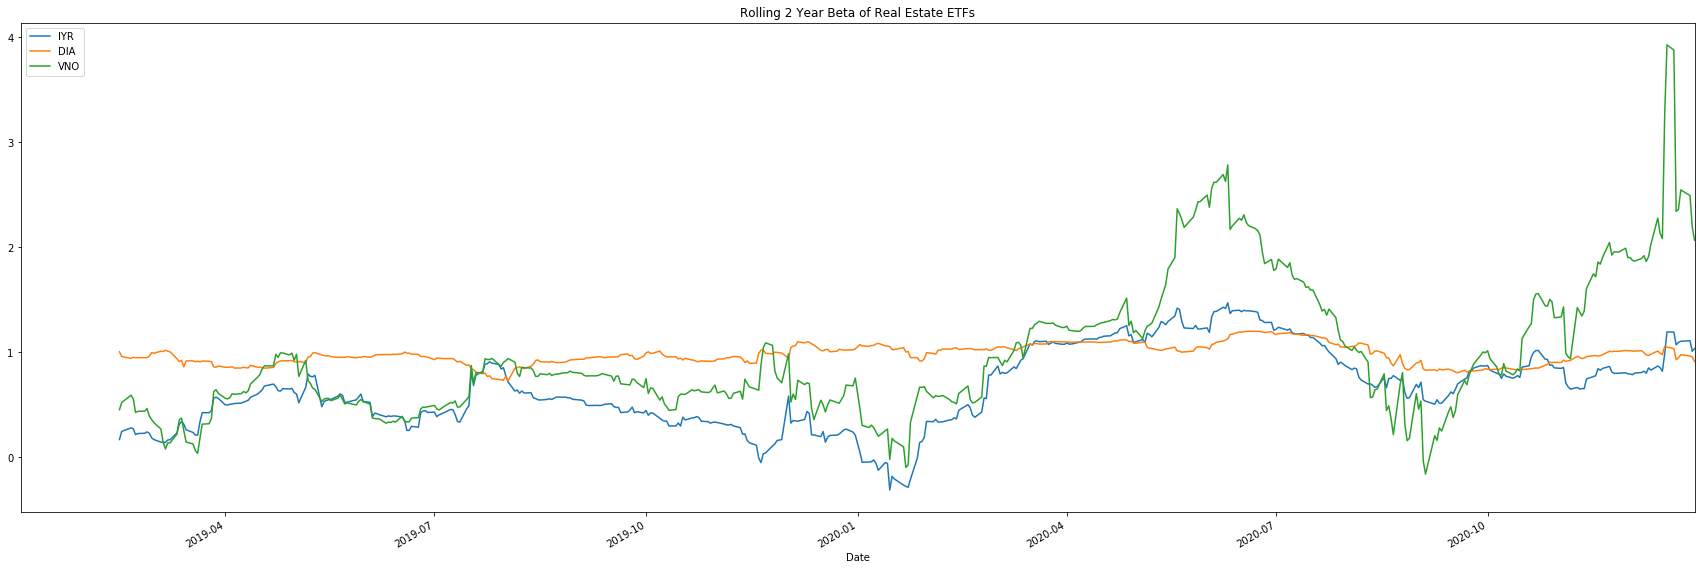

In [25]:
# Set the figure and plot the different datasets as multiple trends on the same figure
ax = rolling_iyr_beta.plot(figsize=(30, 10), title='Rolling 2 Year Beta of Real Estate ETFs')
rolling_dia_beta.plot(ax=ax)
rolling_vno_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["IYR", "DIA", "VNO"])